### task 2- Perform data cleaning and exploratory data analysis (EDA) on a dataset

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:\n", titanic.head())

# Basic information about the dataset
print("\nDataset Info:")
print(titanic.info())

# Summary statistics
print("\nSummary Statistics:")
print(titanic.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(titanic.isnull().sum())


Dataset Preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [4]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
# 1. Fill missing values in 'Age' with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# 2. Fill missing values in 'Embarked' with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# 3. Drop 'Cabin' column (due to too many missing values)
if 'Cabin' in titanic.columns:
    titanic.drop('Cabin', axis=1, inplace=True)

# 4. Drop duplicate rows, if any
titanic.drop_duplicates(inplace=True)

# Verify if cleaning is successful
print("\nMissing Values After Cleaning:")
print(titanic.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


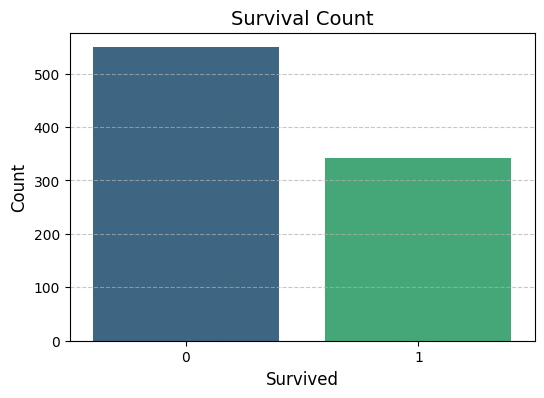

In [12]:
# Ensure 'Age' column is numeric before plotting
if titanic['Age'].dtype != 'float64' and titanic['Age'].dtype != 'int64':
    titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')



# Countplot for Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=titanic, palette='viridis', dodge=False, legend=False)
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


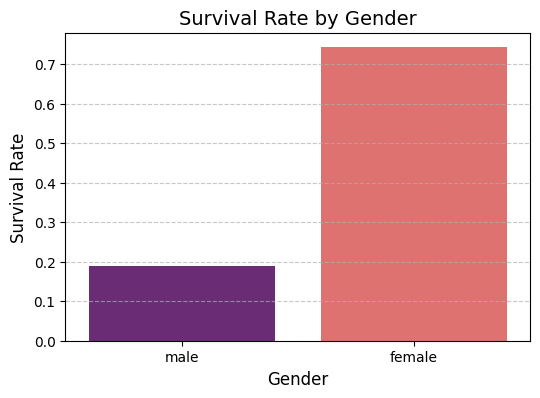

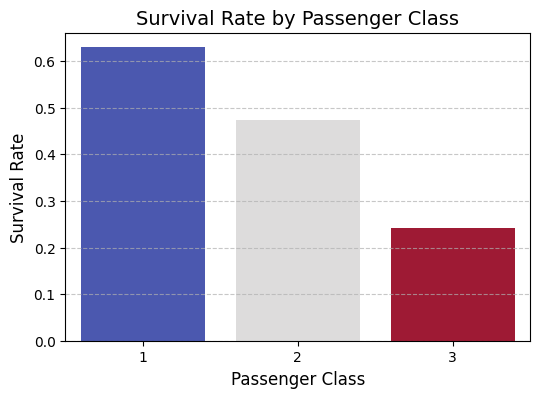

In [14]:
# Survival rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=titanic, dodge=False, palette='magma', errorbar=None)
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend as it's redundant in this context
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Survival rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=titanic, dodge=False, palette='coolwarm', errorbar=None)
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend as it's redundant in this context
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# Save the cleaned dataset
titanic.to_csv('cleaned_titanic.csv', index=False)